# Introduction

The dataset used in this project is derived from a credit card company, encompassing various attributes related to customer demographics, credit card usage, and payment history. It includes categorical variables such as gender, education, and marital status, alongside continuous variables detailing monthly payments, bill amounts, and default payment status. The primary objective with this dataset is to analyze and predict customer default behavior, leveraging machine learning models to identify patterns and correlations within the data. This comprehensive dataset serves as a foundation for applying advanced data processing techniques and predictive modeling, aiming to enhance decision-making processes for credit risk assessment.

In [1]:
#Load dataset
import pandas as pd
card = pd.read_csv('BestCard_data.csv')
card

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,high school,0,1,0,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,high school,0,1,0,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,university,0,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,high school,0,1,0,0,0


## Preprocessing
Preprocessing is essential to clean and prepare the data for modeling. It involves checking data types, handling missing values, and encoding categorical variables. Ensuring data is in the right format and free of missing values helps in applying machine learning models more effectively and obtaining accurate predictions.

The preprocessing step in this project involved several key activities to prepare the credit card dataset for analysis. Initially, the dataset is loaded and inspected for data types and missing values to ensure data integrity. Categorical variables are identified and examined for unique values, aiding in understanding the dataset's diversity. To streamline the dataset some columns are dropped, and categorical variables are encoded using one-hot encoding to convert them into a format suitable for machine learning models. This step is crucial to remove redundancies and transform categorical data into a numerical format, enhancing the dataset's suitability for the subsequent modeling phase.

In [2]:
#Check data types to ensure each column is the appropriate type for analysis
card.dtypes

ID                            object
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_1                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
EDUCATION_CAT                 object
graduate school                int64
h

In [3]:
#Check for missing values in the dataset to decide on handling strategies
card.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
EDUCATION_CAT                 0
graduate school               0
high school                   0
none                          0
others                        0
university                    0
dtype: i

In [4]:
# Identify unique values in categorical variables to understand data distribution

# List of categorical columns to check for unique values
columns_to_check = ['SEX', 'EDUCATION', 'EDUCATION_CAT', 'MARRIAGE']

# Initialize an empty dictionary to store unique values for each column
unique_values = {}

# Iterate over each column in the specified list and store them in the dictionary
for column in columns_to_check:
    unique_values[column] = card[column].unique()

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in {column}: {values}")


Unique values in SEX: [2 1]
Unique values in EDUCATION: [2 1 3 4]
Unique values in EDUCATION_CAT: ['university' 'graduate school' 'high school' 'none' 'others']
Unique values in MARRIAGE: [1 2 3]


In [5]:
# Dropping specified columns ('EDUCATION', 'EDUCATION_CAT', 'ID') from the 'card' DataFrame
card.drop(columns=['EDUCATION','EDUCATION_CAT','ID'], inplace=True)

In [6]:
card

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,none,others,university
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,0,0,0,0,1
2,90000,2,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,0,0,0,0,1
3,50000,2,1,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,0,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,220000,1,1,39,0,0,0,0,0,0,...,5003,3047,5000,1000,0,0,1,0,0,0
26660,150000,1,2,43,-1,-1,-1,-1,0,0,...,8998,129,0,0,0,0,1,0,0,0
26661,30000,1,2,37,4,3,2,-1,0,0,...,22000,4200,2000,3100,1,0,0,0,0,1
26662,80000,1,1,41,1,-1,0,0,0,-1,...,1178,1926,52964,1804,1,0,1,0,0,0


In [7]:
# Encode categorical columns 'MARRIAGE' and 'SEX' using one-hot encoding
card_encoded = pd.get_dummies(card, columns=['MARRIAGE', 'SEX'])

# Convert the encoded DataFrame to integer type for binary encoding (0 or 1)
card_encoded = card_encoded.astype(int)

In [8]:
card_encoded

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,high school,none,others,university,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_1,SEX_2
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,1,0,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,0,1,0,1,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,0,0,1,0,1,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,0,0,1,1,0,0,0,1
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,220000,39,0,0,0,0,0,0,188948,192815,...,0,1,0,0,0,1,0,0,1,0
26660,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0,1,0,0,0,0,1,0,1,0
26661,30000,37,4,3,2,-1,0,0,3565,3356,...,0,0,0,0,1,0,1,0,1,0
26662,80000,41,1,-1,0,0,0,-1,-1645,78379,...,0,1,0,0,0,1,0,0,1,0


## Correlation graph 
The correlation graph is generated using a heatmap to visualize the relationships between the one-hot encoded features of the dataset. This visualization is instrumental in identifying potential multicollinearity between variables and understanding how different features may influence the target variable, 'default payment next month'. Insights from the correlation graph can guide feature selection and model refinement, making it a critical step in exploratory data analysis.

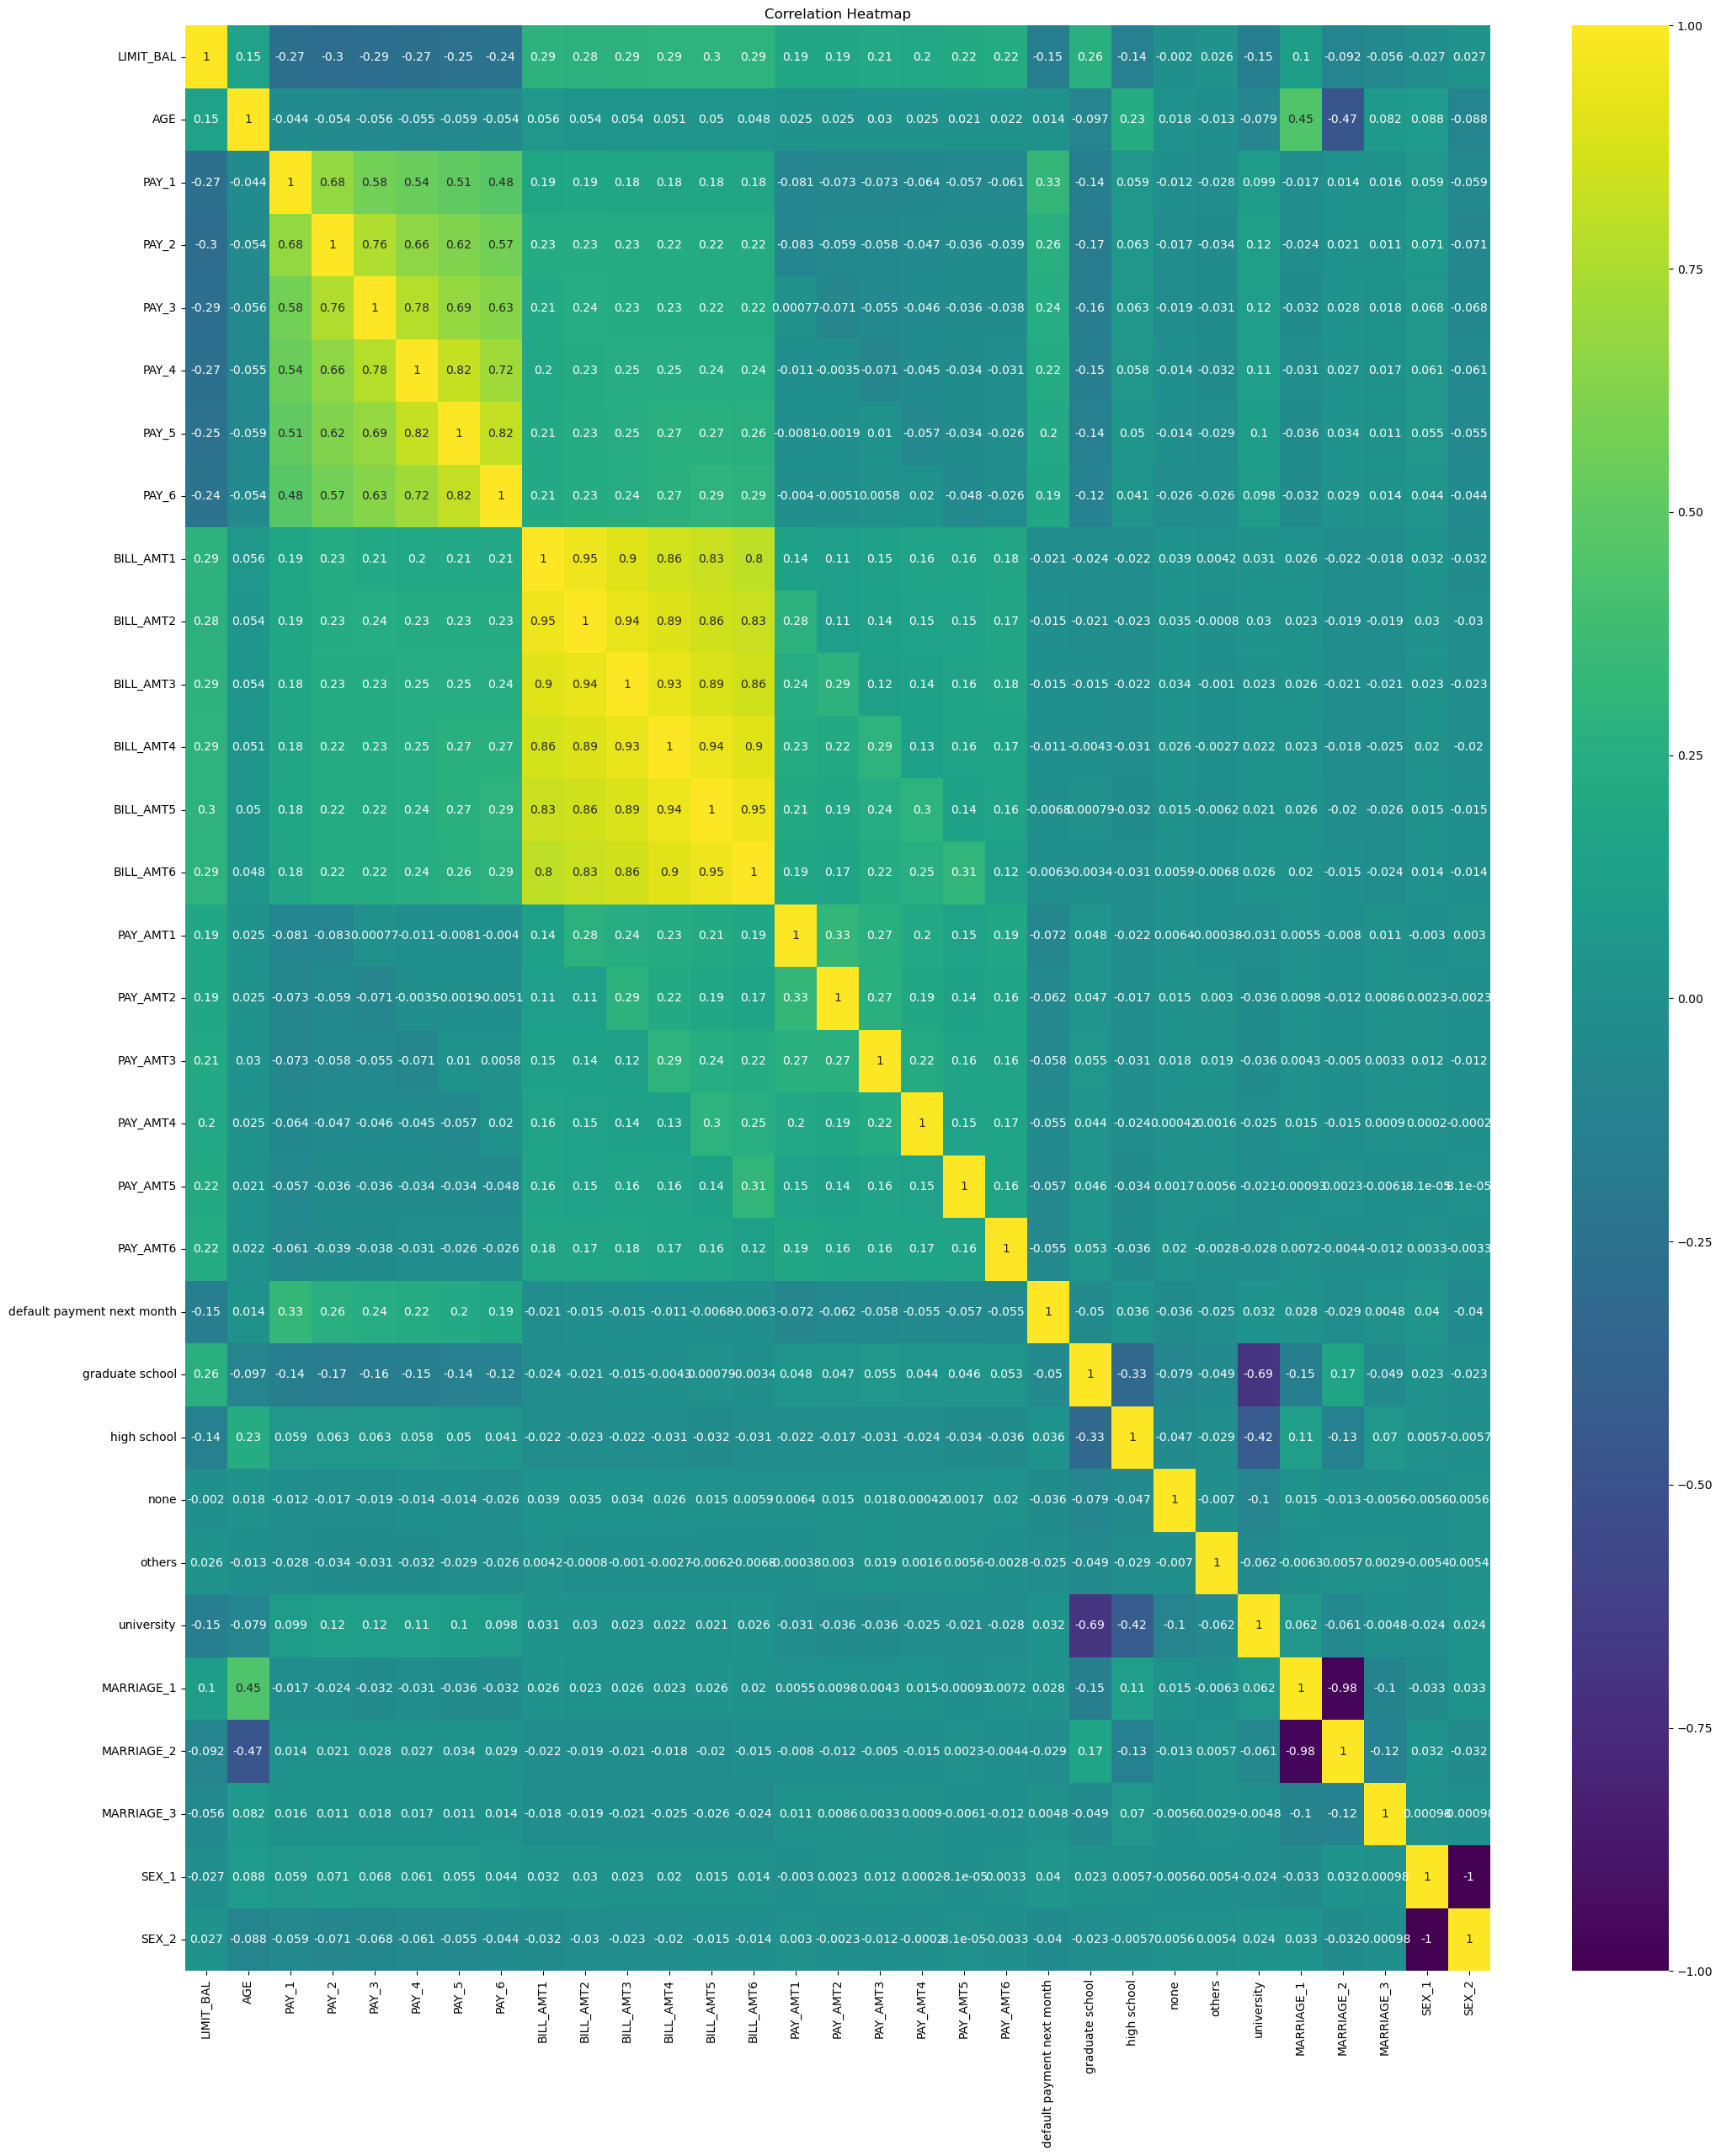

In [9]:
# Import necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the one-hot encoded DataFrame 'card_encoded'
corr = card_encoded.corr()

plt.figure(figsize=(25, 30))

# Create a heatmap using Seaborn to visualize the correlation matrix
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Specify the column to be moved to a specific position in the DataFrame
column_to_move = 'default payment next month' 

# Get the list of all columns in the DataFrame 'card_encoded'
columns = list(card_encoded.columns)

# Remove the specified column from its original position
columns.remove(column_to_move)

# Insert the removed column at the desired index (index 30 in this case)
columns.insert(30, column_to_move)

# Create a new DataFrame 'card_final' by rearranging columns as per the modified list
card_final = card_encoded[columns]

card_final

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,high school,none,others,university,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_1,SEX_2,default payment next month
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,1,0,0,0,1,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,1,0,1,0,0,1,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,0,1,0,1,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,0,1,1,0,0,0,1,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,220000,39,0,0,0,0,0,0,188948,192815,...,1,0,0,0,1,0,0,1,0,0
26660,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,1,0,0,0,0,1,0,1,0,0
26661,30000,37,4,3,2,-1,0,0,3565,3356,...,0,0,0,1,0,1,0,1,0,1
26662,80000,41,1,-1,0,0,0,-1,-1645,78379,...,1,0,0,0,1,0,0,1,0,1


In [11]:
# Display the count of unique values in the 'default payment next month' column of the final DataFrame
card_final['default payment next month'].value_counts()

default payment next month
0    20750
1     5914
Name: count, dtype: int64

In [12]:
# Predictor variables (all rows, columns from 1 to 29)
X = card_final.iloc[:, 0:30]  


# Target variable (all rows, column 30)
Y = card_final.iloc[:, 30]


In [13]:
X

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,high school,none,others,university,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_1,SEX_2
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,1,0,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,0,1,0,1,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,0,0,1,0,1,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,0,0,1,1,0,0,0,1
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,220000,39,0,0,0,0,0,0,188948,192815,...,0,1,0,0,0,1,0,0,1,0
26660,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0,1,0,0,0,0,1,0,1,0
26661,30000,37,4,3,2,-1,0,0,3565,3356,...,0,0,0,0,1,0,1,0,1,0
26662,80000,41,1,-1,0,0,0,-1,-1645,78379,...,0,1,0,0,0,1,0,0,1,0


In [14]:
Y

0        1
1        1
2        0
3        0
4        0
        ..
26659    0
26660    0
26661    1
26662    1
26663    1
Name: default payment next month, Length: 26664, dtype: int64

In [15]:
# Import the StandardScaler class from scikit-learn for feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Use the scaler to standardize the features in DataFrame 'X', replacing the original values
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,high school,none,others,university,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_1,SEX_2
0,-1.139267,-1.246871,1.790797,1.779853,-0.694097,-0.663579,-1.528864,-1.483576,-0.644999,-0.651289,...,-0.73862,-0.443344,-0.106493,-0.065815,1.067854,1.091147,-1.064000,-0.112628,-0.811301,0.811301
1,-0.369071,-1.030122,-0.871733,1.779853,0.139833,0.192677,0.238368,1.994057,-0.661717,-0.670701,...,-0.73862,-0.443344,-0.106493,-0.065815,1.067854,-0.916467,0.939849,-0.112628,-0.811301,0.811301
2,-0.600130,-0.163127,0.015777,0.111264,0.139833,0.192677,0.238368,0.255240,-0.301046,-0.497271,...,-0.73862,-0.443344,-0.106493,-0.065815,1.067854,-0.916467,0.939849,-0.112628,-0.811301,0.811301
3,-0.908208,0.161997,0.015777,0.111264,0.139833,0.192677,0.238368,0.255240,-0.059970,-0.015042,...,-0.73862,-0.443344,-0.106493,-0.065815,1.067854,1.091147,-1.064000,-0.112628,-0.811301,0.811301
4,-0.908208,2.329485,-0.871733,0.111264,-0.694097,0.192677,0.238368,0.255240,-0.581114,-0.615086,...,-0.73862,-0.443344,-0.106493,-0.065815,1.067854,1.091147,-1.064000,-0.112628,1.232588,-1.232588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,0.401126,0.378746,0.015777,0.111264,0.139833,0.192677,0.238368,0.255240,1.867961,2.023241,...,-0.73862,2.255587,-0.106493,-0.065815,-0.936458,1.091147,-1.064000,-0.112628,1.232588,-1.232588
26660,-0.138012,0.812243,-0.871733,-0.723030,-0.694097,-0.663579,0.238368,0.255240,-0.675284,-0.669249,...,-0.73862,2.255587,-0.106493,-0.065815,-0.936458,-0.916467,0.939849,-0.112628,1.232588,-1.232588
26661,-1.062248,0.161997,3.565817,2.614147,1.807691,-0.663579,0.238368,0.255240,-0.649725,-0.647708,...,-0.73862,-0.443344,-0.106493,-0.065815,1.067854,-0.916467,0.939849,-0.112628,1.232588,-1.232588
26662,-0.677149,0.595494,0.903287,-0.723030,0.139833,0.192677,0.238368,-0.614168,-0.720482,0.409949,...,-0.73862,2.255587,-0.106493,-0.065815,-0.936458,1.091147,-1.064000,-0.112628,1.232588,-1.232588


In [16]:
# Import necessary libraries for splitting the dataset
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

## SVC (Support Vector Classifier)

The SVC model is utilized for its robustness in handling high-dimensional data, which is common in credit card datasets due to numerous features like demographics, transaction history, and account information. The model works by finding the optimal hyperplane that maximizes the margin between different classes, which in this case are 'default' and 'non-default' credit card users. This characteristic makes SVC particularly suitable for your dataset, as it efficiently deals with the complexity and potential non-linearity in the relationships between features. The use of metrics such as accuracy, precision, recall, and F1 score, alongside confusion matrices and ROC curves, provides a comprehensive evaluation of the model's performance, ensuring its reliability in classifying customers accurately

In [17]:
# Import support vector machine (SVM) model
from sklearn.svm import SVC

# Initialize a Support Vector Machine (SVM) classifier
svc_model = SVC()

# Train the SVM model on the training set
svc_model.fit(X_train, Y_train)

# Evaluate the accuracy of the trained SVM model on the testing set
accuracy_svc = svc_model.score(X_test, Y_test)
print(f"SVC Model Accuracy: {accuracy_svc * 100:.2f}%")


SVC Model Accuracy: 82.92%


In [18]:
from sklearn.metrics import confusion_matrix

# Predict the responses for the test dataset X_test
Y_pred_svc = svc_model.predict(X_test)

# Compute the confusion matrix using the true labels Y_test and predicted labels Y_pred
cm_svc = confusion_matrix(Y_test, Y_pred_svc)
print(cm_svc)


[[4040  164]
 [ 747  382]]


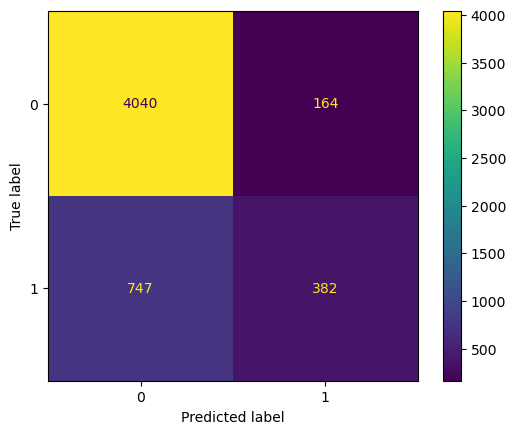

In [19]:
#plot_confusion_matrix(tree, X_test, Y_test)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc_model,X_test,Y_test)

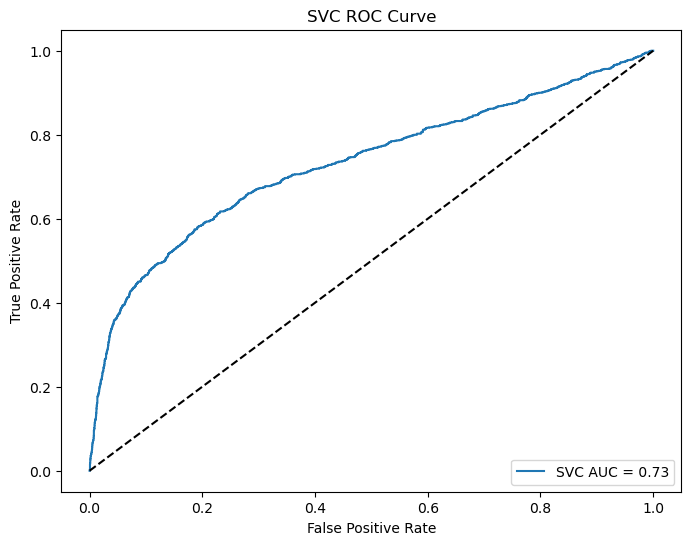

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate scores using the decision function
svc_scores = svc_model.decision_function(X_test)

# Calculate the ROC curve and AUC
fpr_svc, tpr_svc, thresholds_svc = roc_curve(Y_test, svc_scores)
auc_svc = auc(fpr_svc, tpr_svc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVC AUC = {auc_svc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
# Import necessary metrics from scikit-learn for evaluating classification performance
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score for the SVM model
precision_svc = precision_score(Y_test, Y_pred_svc, average='binary') * 100
recall_svc = recall_score(Y_test, Y_pred_svc, average='binary') * 100
f1_svc = f1_score(Y_test, Y_pred_svc, average='binary') * 100
print(f"Precision for SVC: {precision_svc:.2f}%")
print(f"Recall for SVC: {recall_svc:.2f}%")
print(f"F1 Score for SVC: {f1_svc:.2f}%")

Precision for SVC: 69.96%
Recall for SVC: 33.84%
F1 Score for SVC: 45.61%


## Neural Network

The Neural Network model, implemented as a Multi-Layer Perceptron (MLP) Classifier, is chosen for its ability to model complex and nonlinear relationships through its multiple layers and neurons. This model is particularly adept at handling the intricate patterns that might exist in the credit card dataset, such as interactions between different demographic factors and transaction behaviors. By learning from these complex patterns, the MLPClassifier can potentially uncover deep insights into the factors influencing credit card defaults, making it a powerful tool for prediction in this context. The evaluation of this model also involves accuracy, precision, recall, and F1 score metrics, along with confusion matrices and ROC curves, ensuring a thorough assessment of its predictive capabilities and its suitability for the task at hand​

In [22]:
# Import the Multi-layer Perceptron (MLP) classifier from scikit-learn
from sklearn.neural_network import MLPClassifier

# Initialize an instance of the MLPClassifier
neural_net_model = MLPClassifier()

# Train the neural network model on the training set
neural_net_model.fit(X_train, Y_train)

# Evaluate the accuracy of the trained neural network model on the testing set
accuracy_nn = neural_net_model.score(X_test, Y_test)
print(f"Neural Network Model Accuracy: {accuracy_nn * 100:.2f}%")


Neural Network Model Accuracy: 81.94%


/Users/nishkarshgupta/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
Y_pred_nn = neural_net_model.predict(X_test)

# Compute the confusion matrix using the true labels Y_test and predicted labels Y_pred
cm_neural = confusion_matrix(Y_test, Y_pred_nn)
print(cm_neural)


[[3957  247]
 [ 716  413]]


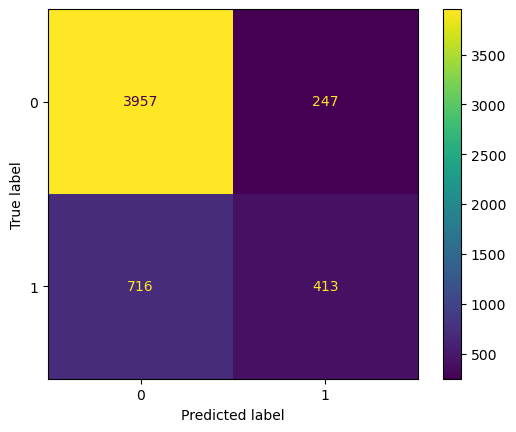

In [24]:
#plot_confusion_matrix(tree, X_test, Y_test)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(neural_net_model,X_test,Y_test)

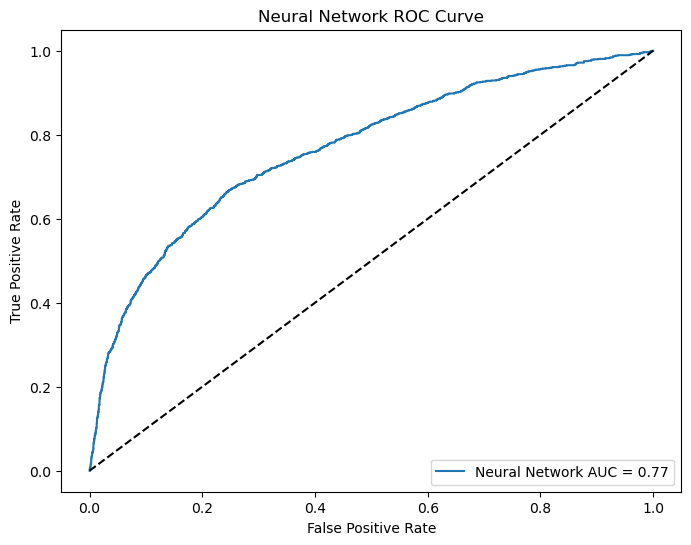

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probabilities for the positive class
nn_probs = neural_net_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr_nn, tpr_nn, thresholds_nn = roc_curve(Y_test, nn_probs)
auc_nn = auc(fpr_nn, tpr_nn)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network AUC = {auc_nn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
# Import necessary metrics from scikit-learn for evaluating classification performance
precision_nn = precision_score(Y_test, Y_pred_nn, average='binary') * 100
recall_nn = recall_score(Y_test, Y_pred_nn, average='binary') * 100
f1_nn = f1_score(Y_test, Y_pred_nn, average='binary') * 100
print(f"Precision for Neural Network : {precision_nn:.2f}%")
print(f"Recall for Neural Network: {recall_nn:.2f}%")
print(f"F1 Score for Neural Network: {f1_nn:.2f}%")

Precision for Neural Network : 62.58%
Recall for Neural Network: 36.58%
F1 Score for Neural Network: 46.17%


## Random Forest Model
The Random Forest model, an ensemble of decision trees, is notable for its high predictive accuracy. It minimizes error and bias by incorporating random features and subsets in each tree, making it less sensitive to outliers and adaptable for imbalanced data. This versatility makes Random Forest suitable for both classification and regression tasks. The model’s effectiveness is evaluated using metrics like accuracy, highlighting its capability to provide reliable and unbiased predictions.

In [27]:
# Random forest model - an ensemble of decision trees. 
from sklearn.ensemble import RandomForestClassifier

#Instantiate random forest model. Set class weight to balanced to account for imbalance in test data.
forest = RandomForestClassifier(n_estimators=350, class_weight='balanced', random_state=0)

In [28]:
#fit model with training data
forest.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=350,
                       random_state=0)

In [29]:
from sklearn.metrics import accuracy_score

# Predict using test data
y_rf_pred = forest.predict(X_test)

# Store the accuracy in the variable accuracy_rf
accuracy_rf = accuracy_score(Y_test, y_rf_pred)

# Print the accuracy
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Accuracy: 82.22%


In [30]:
#extract feature importances from the trained model
importances = forest.feature_importances_

#create data frame to store importance values
df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
df = df.sort_values('importance')
print(df)

            feature  importance
23           others    0.000316
27       MARRIAGE_3    0.001338
22             none    0.001452
21      high school    0.006986
26       MARRIAGE_2    0.007992
28            SEX_1    0.008000
29            SEX_2    0.008076
25       MARRIAGE_1    0.008137
20  graduate school    0.008326
24       university    0.009171
7             PAY_6    0.017998
6             PAY_5    0.021321
5             PAY_4    0.023289
4             PAY_3    0.031717
3             PAY_2    0.041112
18         PAY_AMT5    0.042970
17         PAY_AMT4    0.043360
19         PAY_AMT6    0.046909
16         PAY_AMT3    0.047927
12        BILL_AMT5    0.048290
11        BILL_AMT4    0.048379
13        BILL_AMT6    0.048401
10        BILL_AMT3    0.049368
15         PAY_AMT2    0.049376
14         PAY_AMT1    0.051279
9         BILL_AMT2    0.052639
8         BILL_AMT1    0.060739
1               AGE    0.060866
0         LIMIT_BAL    0.061905
2             PAY_1    0.092361


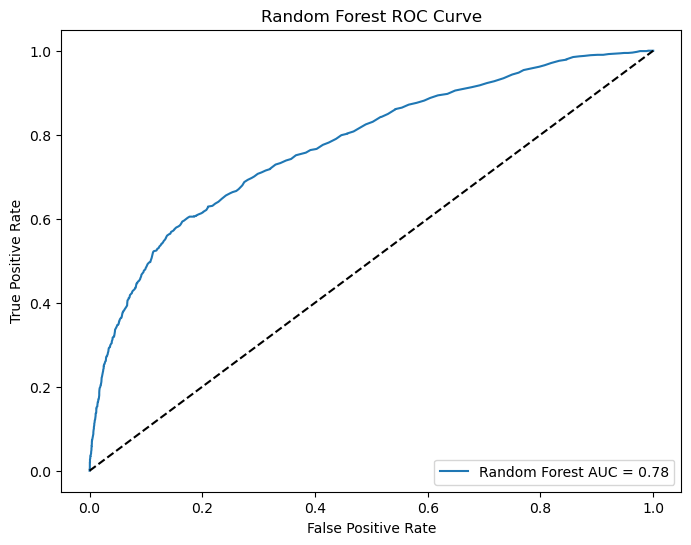

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities for the positive class
rf_probs = forest.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

#calculate confusion matrix, precision, recall & F1 score
cm_rf = confusion_matrix(Y_test, y_rf_pred)
print("Confusion Matrix:\n",cm_rf)

Confusion Matrix:
 [[3985  219]
 [ 729  400]]


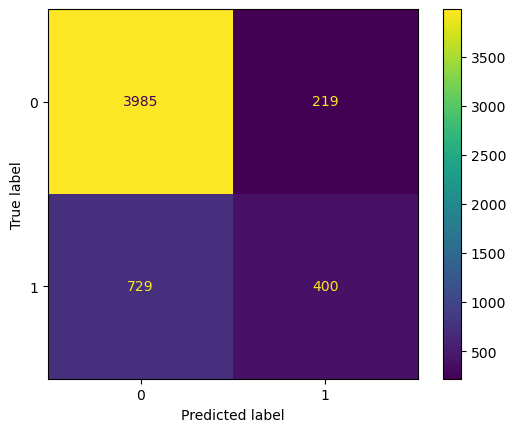

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

#display confusion matrix
ConfusionMatrixDisplay.from_estimator(forest,X_test,Y_test)

In [34]:
precision_rf = precision_score(Y_test, y_rf_pred)
recall_rf = recall_score(Y_test, y_rf_pred)
f1_rf = f1_score(Y_test, y_rf_pred)

print(f"Precision for Random Forest: {precision_rf*100:.2f}%")
print(f"Recall for Random Forest: {recall_rf*100:.2f}%")
print(f"F1 Score for Random Forest: {f1_rf*100:.2f}%")


Precision for Random Forest: 64.62%
Recall for Random Forest: 35.43%
F1 Score for Random Forest: 45.77%


## Logistics Regression
Logistic Regression is employed for its probabilistic predictions, effective training, and comprehensible results. It excels in a variety of classification tasks, supports regularization to prevent overfitting, and scales well with large datasets. The interpretability of its coefficients is a key advantage, shedding light on the significance of each feature. The model undergoes rigorous hyperparameter tuning and cross-validation to optimize its performance, and its success is evaluated using accuracy, precision, recall, and F1 score metrics, ensuring its reliability and balance between complexity and performance.

In [35]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=0, max_iter=1000)
logistic_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [36]:
# Predict and evaluate the model
Y_pred_lr = logistic_model.predict(X_test)

In [37]:
from sklearn import metrics
accuracy_lr = metrics.accuracy_score(Y_test, Y_pred_lr)
print("Logistics Regression Accuracy: {:.2f}%".format(accuracy_lr * 100))

Logistics Regression Accuracy: 82.45%


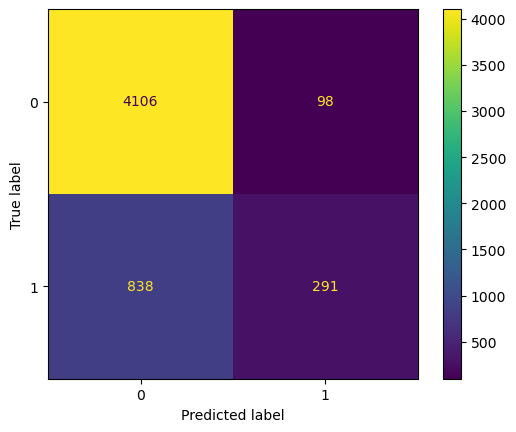

In [38]:
# Display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logistic_model,X_test,Y_test)

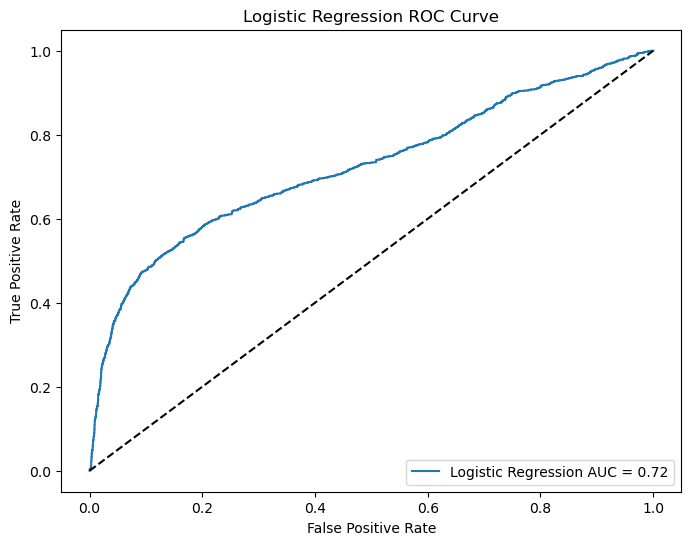

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities for the positive class
lr_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

# Plot the ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression AUC = {auc_lr:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
# Calculate precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision_lr = precision_score(Y_test, Y_pred_lr)*100
recall_lr = recall_score(Y_test, Y_pred_lr)*100
f1_lr = f1_score(Y_test, Y_pred_lr)*100

print(f"Precision for Logistic Regression: {precision_lr:.2f}%")
print(f"Recall Logistic Regression: {recall_lr:.2f}%")
print(f"F1 Score Logistic Regression: {f1_lr:2f}%")

Precision for Logistic Regression: 74.81%
Recall Logistic Regression: 25.78%
F1 Score Logistic Regression: 38.339921%


In [41]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate model with best hyperparameters on test set
best_model = grid_search.best_estimator_
test_accuracy_logistic = best_model.score(X_test, Y_test)*100
print("Test Accuracy:", test_accuracy_logistic)

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Test Accuracy: 82.44890305644103


/Users/nishkarshgupta/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nishkarshgupta/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nishkarshgupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/nishkarshgupta/anaconda3/lib/python3.11/site-packa

## Decision Tree Model
Decision Tree model is a predictive tool that stands out for its interpretability and ability to handle mixed data types. It works by recursively partitioning the data into subsets based on input feature values. Decision Trees are popular for their clarity in decision-making processes and require minimal assumptions about data distribution. They are capable of capturing non-linear relationships and highlighting feature importance. The model's performance is assessed through various metrics, including accuracy, precision, recall, and F1 score, along with the visualization of decision processes, providing a transparent understanding of its decision-making mechanics.

In [42]:
# Importing the DecisionTreeClassifier class from sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# Importing the accuracy_score function from sklearn.metrics module
from sklearn.metrics import accuracy_score

# Instantiating the DecisionTreeClassifier model
# Setting random_state=0 for reproducibility of results
tree = DecisionTreeClassifier(max_depth=3,random_state=0)

# Fitting the DecisionTreeClassifier model to the training data
# X_train: Features of the training set
# y_train: Target variable of the training set
tree.fit(X_train, Y_train)

# Making predictions on the testing set using the trained model
y_pred_dt = tree.predict(X_test)

In [43]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

# Training set accuracy
train_accuracy = tree.score(X_train, Y_train)
print("Accuracy on training set: {:.2f}%".format(train_accuracy * 100))

# Testing set accuracy
test_accuracy = accuracy_score(y_pred_dt, Y_test)
print("Accuracy on test set: {:.2f}%".format(test_accuracy * 100))


Accuracy on training set: 82.04%
Accuracy on test set: 82.77%


In [44]:
# Importing the accuracy_score function from scikit-learn's metrics module
from sklearn import metrics

# Calculating the accuracy of the Decision Tree model by comparing predicted and true labels
# Y_test contains the true labels, and y_pred contains the predicted labels
accuracy_dt = metrics.accuracy_score(Y_test, y_pred_dt) 

# Printing the accuracy of the Decision Tree model in percentage format
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_dt * 100))


Decision Tree Accuracy: 82.77%


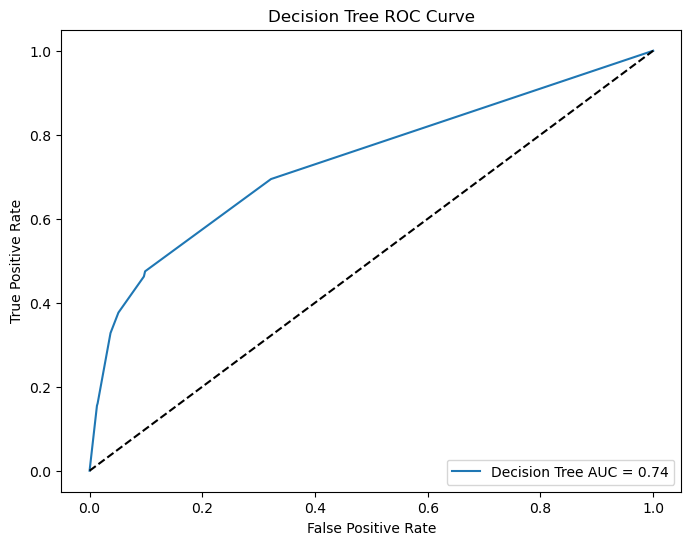

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Making predictions on the testing set using the trained Decision Tree Classifier model
y_pred_proba_tree = tree.predict_proba(X_test)[:, 1]  # Predicting probabilities of positive class (class 1)

# Calculate the ROC curve and AUC for Decision Tree
fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_test, y_pred_proba_tree)
auc_tree = auc(fpr_tree, tpr_tree)

# Plotting the ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree AUC = {auc_tree:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()


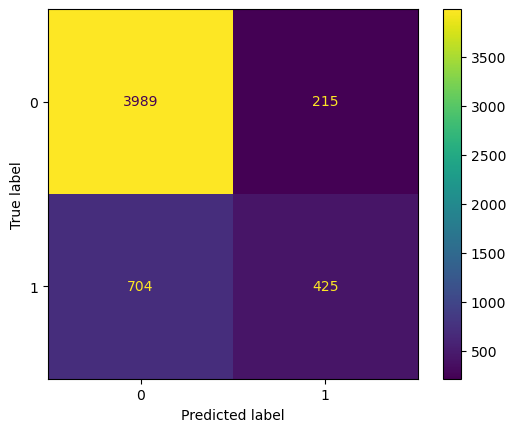

In [46]:
# Importing ConfusionMatrixDisplay from scikit-learn's metrics module
from sklearn.metrics import ConfusionMatrixDisplay

# Creating a ConfusionMatrixDisplay object to visualize the confusion matrix for the Decision Tree model
# The 'tree' parameter represents the trained Decision Tree model
# 'X_test' and 'Y_test' are the feature and label sets of the test data
ConfusionMatrixDisplay.from_estimator(tree, X_test, Y_test)

In [47]:
# Calculate precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision_dt = precision_score(Y_test, y_pred_dt)*100
recall_dt = recall_score(Y_test, y_pred_dt)*100
f1_dt = f1_score(Y_test, y_pred_dt)*100

print(f"Precision for Decision Tree: {precision_dt:.2f}%")
print(f"Recall for Decision Tree: {recall_dt:.2f}%")
print(f"F1 Score for Decision Tree: {f1_dt:.2f}%")

Precision for Decision Tree: 66.41%
Recall for Decision Tree: 37.64%
F1 Score for Decision Tree: 48.05%


In [48]:
# Importing necessary libraries
import numpy as np  # Importing numpy library
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV class from sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier class from sklearn.tree module

# Instantiating the DecisionTreeClassifier model
tree = DecisionTreeClassifier()  # Instantiating a DecisionTreeClassifier object

# Defining the parameter grid with narrowed down ranges
params = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting ('gini' or 'entropy')
    'max_leaf_nodes': [None] + list(range(2, 20)),  # Maximum number of leaf nodes (None indicates no maximum limit)
    'max_depth': [None] + list(np.arange(3, 10))  # Maximum depth of the decision tree (None indicates no maximum depth)
}

# Using GridSearchCV to perform hyperparameter tuning
# GridSearchCV exhaustively searches for the best combination of hyperparameters by evaluating all possible combinations
# 'tree' is the estimator (model) to be tuned
# 'params' is the dictionary of hyperparameters and their possible values
# cv specifies the number of folds for cross-validation
tree_grid = GridSearchCV(tree, params, cv=3)  # Instantiating a GridSearchCV object with cv=3 (3-fold cross-validation)

# Fitting the GridSearchCV object to the training data to perform hyperparameter tuning
tree_grid.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                            11, 12, 13, 14, 15, 16, 17, 18,
                                            19]})

In [49]:
# Printing the best parameters and best cross-validation score
print("Best parameters:", tree_grid.best_params_)  # Printing the best combination of hyperparameters found
print("Best cross-validation score:", tree_grid.best_score_)  # Printing the best cross-validation score

# Evaluating the best model on the test set
best_tree = tree_grid.best_estimator_  # Retrieving the best estimator found by GridSearchCV
y_pred_dt = best_tree.predict(X_test)  # Making predictions on the test set using the best model
print("Accuracy on test set: {:.2f}%".format(accuracy_score(y_pred_dt, Y_test)*100))  # Printing the accuracy of the best model on the test set


Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': None}
Best cross-validation score: 0.8190427091984495
Accuracy on test set: 82.77%


In [50]:
#Fit the GridSearchCV object with the training data
tree_grid.fit(X_train, Y_train)

# Access the best estimator after fitting
best_tree_estimator = tree_grid.best_estimator_

best_tree_estimator

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Boosting
Boosting is a powerful technique for classification problems, especially adept at handling categorical features in our dataset. Its main advantage lies in its ability to sequentially correct the errors of previous models, thereby enhancing overall accuracy. While Boosting can be complex to tune and interpret, it stands out for its robust performance across diverse data scenarios. The model is evaluated using a range of metrics including accuracy, precision, recall, F1 score, as well as confusion matrices and ROC curves, ensuring a comprehensive assessment of its predictive capabilities.

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the AdaBoost classifier
boost = AdaBoostClassifier(n_estimators=70, random_state=0)
boost.fit(X_train, Y_train)

# Predict using the test data
Y_boost_pred = boost.predict(X_test)

# Store the accuracy in the variable accuracy_boost
accuracy_boost = accuracy_score(Y_test, Y_boost_pred)  

# Print the accuracy
print(f"AdaBoost Model Accuracy on test set: {accuracy_boost * 100:.2f}%")


AdaBoost Model Accuracy on test set: 83.01%


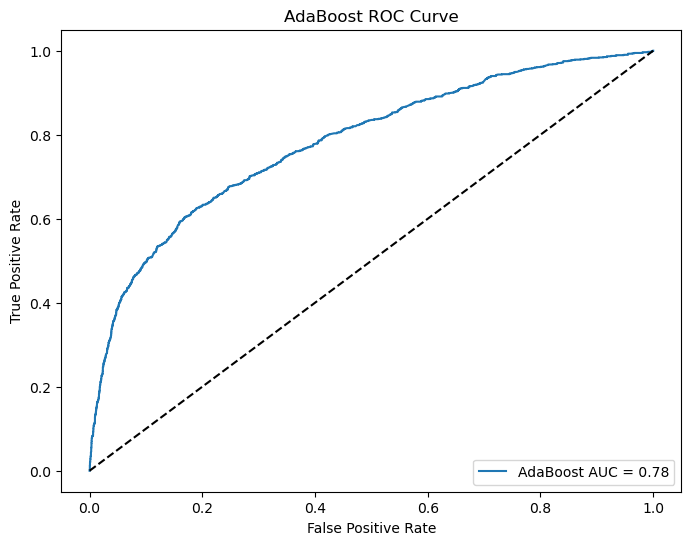

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Making predictions on the testing set using the AdaBoost Classifier model
y_pred_proba_boost = boost.predict_proba(X_test)[:, 1]  # Predicting probabilities of positive class (class 1)

# Calculate the ROC curve and AUC for AdaBoost
fpr_boost, tpr_boost, thresholds_boost = roc_curve(Y_test, y_pred_proba_boost)
auc_boost = auc(fpr_boost, tpr_boost)

# Plotting the ROC curve for AdaBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_boost, tpr_boost, label=f'AdaBoost AUC = {auc_boost:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()


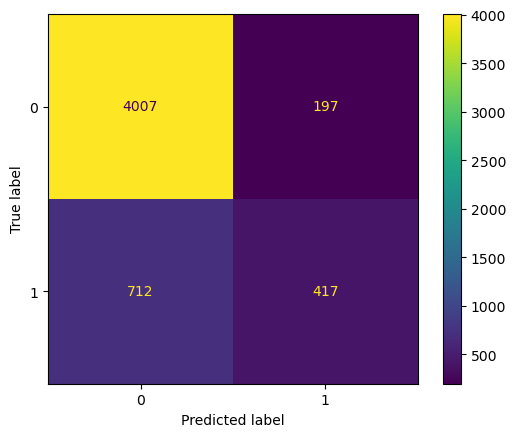

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting model
boost = GradientBoostingClassifier()
boost.fit(X_train, Y_train)

# Make predictions on the test set
Y_boost_pred = boost.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_boost_pred)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=boost.classes_)
disp.plot()


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming Y_test and Y_boost_pred are already defined

# Calculate precision
precision = precision_score(Y_test, Y_boost_pred, average='binary')
print("Precision for Boosting Model: {:.2f}%".format(precision*100 ))

# Calculate recall
recall = recall_score(Y_test, Y_boost_pred, average='binary')
print("Recall for Boosting Model: {:.2f}%".format(recall*100  ))

# Calculate F1 score
f1 = f1_score(Y_test, Y_boost_pred, average='binary')
print("F1 Score for Boosting Model: {:.2f}%".format(f1*100  ))

Precision for Boosting Model: 67.92%
Recall for Boosting Model: 36.94%
F1 Score for Boosting Model: 47.85%


## Bagging
Bagging, implemented through the BaggingClassifier with 100 estimators, is aimed at reducing variance and avoiding overfitting, a common challenge in complex datasets. This technique achieves enhanced model stability and accuracy by aggregating predictions from multiple models, each trained on random subsets of the data. The performance of the Bagging model is quantified using accuracy metrics, demonstrating its effectiveness in generalizing predictions across the dataset.

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

# Initialize and train the Bagging classifier
bagging = BaggingClassifier(n_estimators=100, random_state=0)
bagging.fit(X_train, Y_train)

# Predict using the test data
Y_bagging_pred = bagging.predict(X_test)

# Store the accuracy in the variable accuracy_bagging
accuracy_bagging = accuracy_score(Y_test, Y_bagging_pred)  # Correct order of Y_test and Y_bagging_pred

# Print the accuracy
print(f"Bagging Model Accuracy on test set: {accuracy_bagging * 100:.2f}%")


Bagging Model Accuracy on test set: 82.07%


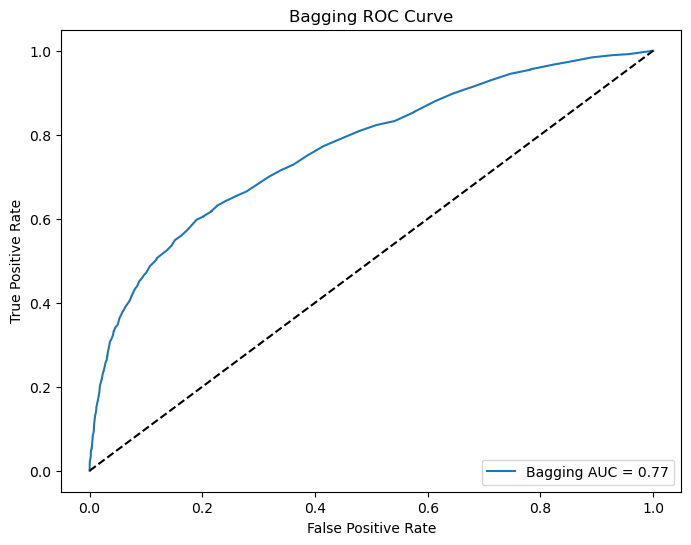

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Making predictions on the testing set using the Bagging Classifier model
y_pred_proba_bagging = bagging.predict_proba(X_test)[:, 1]  # Predicting probabilities of positive class (class 1)

# Calculate the ROC curve and AUC for Bagging
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(Y_test, y_pred_proba_bagging)
auc_bagging = auc(fpr_bagging, tpr_bagging)

# Plotting the ROC curve for Bagging
plt.figure(figsize=(8, 6))
plt.plot(fpr_bagging, tpr_bagging, label=f'Bagging AUC = {auc_bagging:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming Y_test and Y_bagging_pred are already defined

# Calculate precision
precision_bagging = precision_score(Y_test, Y_bagging_pred, average='binary')  # For binary classification
print("Precision for Bagging Model: {:.2f}%".format(precision_bagging * 100))

# Calculate recall
recall_bagging = recall_score(Y_test, Y_bagging_pred, average='binary')  # For binary classification
print("Recall for Bagging Model: {:.2f}%".format(recall_bagging * 100))

# Calculate F1 score
f1_bagging = f1_score(Y_test, Y_bagging_pred, average='binary')  # For binary classification
print("F1 Score for Bagging Model: {:.2f}%".format(f1_bagging * 100))


Precision for Bagging Model: 62.20%
Recall for Bagging Model: 39.06%
F1 Score for Bagging Model: 47.99%


# Visualisations

## Comparison of Model Accuracies 
The graph presents a comparison of model accuracies in descending order for various predictive models. It's clear that Boosting leads with the highest accuracy, closely followed by Support Vector Classifier (SVC), Decision Tree, Logistic Regression Models, Random Forest, Bagging, and finally, the Neural Network. This graph indicates that the Boosting model is the most precise in predicting outcomes based on the dataset provided. However, the differences among the models are relatively slight, suggesting that several models perform well and could be considered for deployment, depending on other factors such as interpretability, execution time, and ease of use.

/var/folders/y_/9hdp2mrx5zlc6m37n0n82cbc0000gn/T/ipykernel_72867/1427259729.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base_color = plt.cm.get_cmap('Reds')


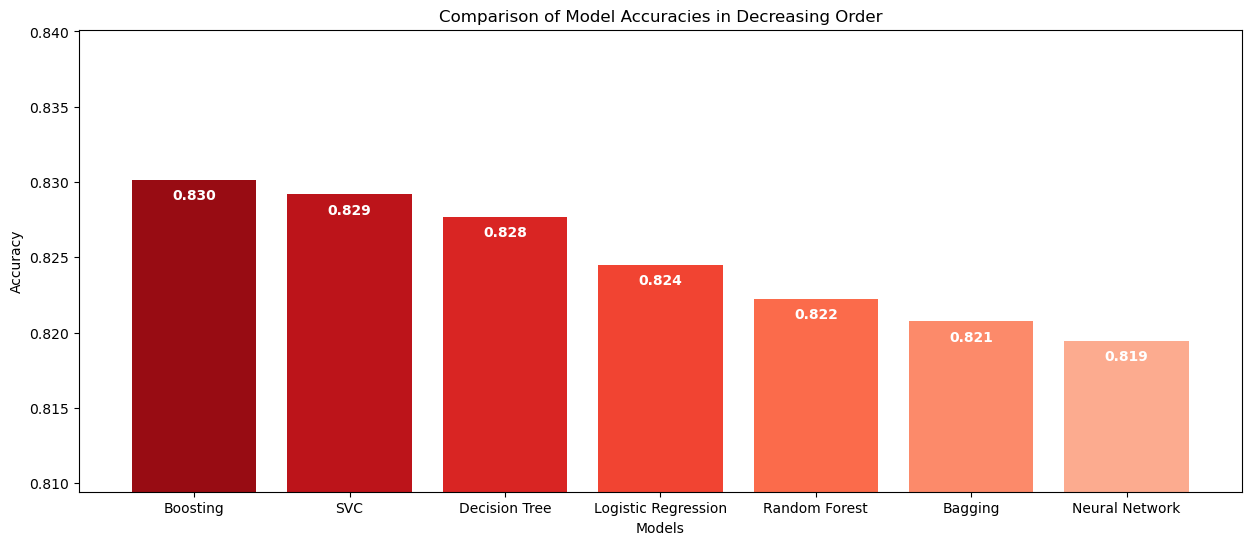

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['SVC', 'Neural Network', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'Boosting', 'Bagging']
accuracies = [accuracy_svc, accuracy_nn, accuracy_rf, accuracy_lr, accuracy_dt, accuracy_boost, accuracy_bagging]

# Sorting the models based on accuracy in decreasing order
sorted_models_accuracies = sorted(zip(accuracies, models), reverse=True)
sorted_accuracies, sorted_models = zip(*sorted_models_accuracies)

# Assigning colors based on accuracy: darker red for higher accuracies, lighter shades for lower accuracies
base_color = plt.cm.get_cmap('Reds')
color_shades = base_color(np.linspace(0.9, 0.3, len(sorted_models)))

# Creating the bar plot with shades of red
plt.figure(figsize=(15, 6))
bars = plt.bar(sorted_models, sorted_accuracies, color=color_shades)

# Adding a slight offset to the y-axis limit to make the highest bar stand out more
ymax = max(sorted_accuracies) + 0.01
plt.ylim(min(sorted_accuracies) - 0.01, ymax)

# Adding the data labels on the bars
for bar, accuracy in zip(bars, sorted_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, accuracy - (ymax-min(sorted_accuracies))*0.05, 
             f'{accuracy:.3f}', ha='center', va='center', color='white', weight='bold')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies in Decreasing Order')
plt.show()


## ROC curves with AUC values
The graph depicts the Receiver Operating Characteristic (ROC) curves with Area Under Curve (AUC) values for the same models. The ROC curve is a graphical representation of a model's diagnostic ability, and the AUC represents a model's capability to distinguish between classes—the higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. Here, both AdaBoost and Random Forest models share the highest AUC value, indicating they are very effective at classifying the positive (default) and negative (non-default) classes. The Neural Network, Decision Tree, SVC, and Logistic Regression follow respectively. This graph complements the first by showing not just accuracy but also the trade-off between true positive rate and false positive rate, which is crucial in evaluating model performance for classification tasks

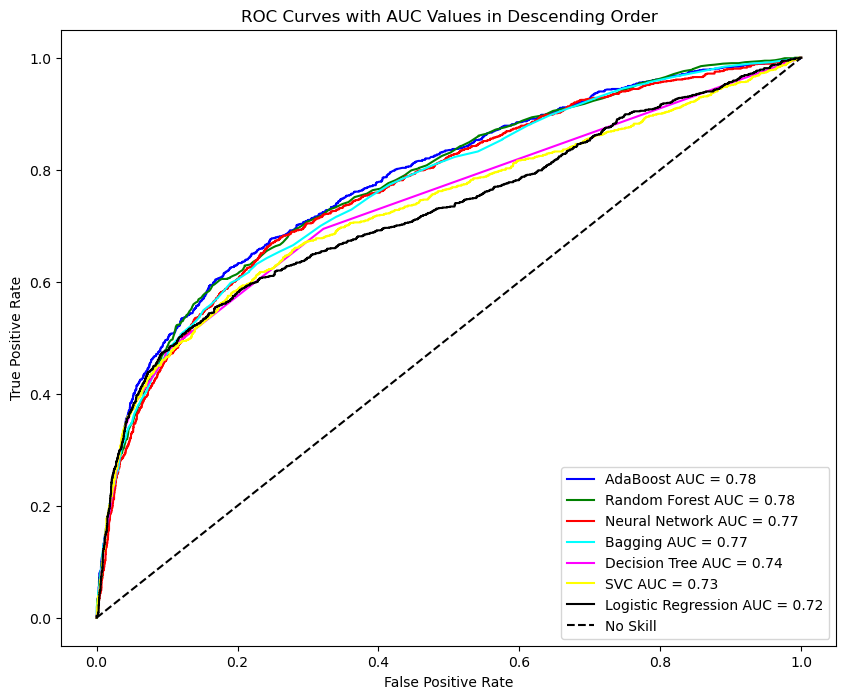

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example AUC values for each model
auc_values = {
    'SVC': auc_svc,
    'Neural Network': auc_nn,
    'Random Forest': auc_rf,
    'Logistic Regression': auc_lr,
    'Decision Tree': auc_tree,
    'AdaBoost': auc_boost,
    'Bagging': auc_bagging
}

# Sort models by AUC in descending order
sorted_models = sorted(auc_values.items(), key=lambda x: x[1], reverse=True)

# Predefined colors for better visibility
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

plt.figure(figsize=(10, 8))

# Correctly use the FPR and TPR for each model
for i, (model, auc) in enumerate(sorted_models):
    if model == 'SVC':
        fpr, tpr = fpr_svc, tpr_svc
    elif model == 'Neural Network':
        fpr, tpr = fpr_nn, tpr_nn
    elif model == 'Random Forest':
        fpr, tpr = fpr_rf, tpr_rf
    elif model == 'Logistic Regression':
        fpr, tpr = fpr_lr, tpr_lr
    elif model == 'Decision Tree':
        fpr, tpr = fpr_tree, tpr_tree
    elif model == 'AdaBoost':
        fpr, tpr = fpr_boost, tpr_boost
    elif model == 'Bagging':
        fpr, tpr = fpr_bagging, tpr_bagging

    plt.plot(fpr, tpr, color=colors[i], label=f'{model} AUC = {auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # No-skill line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves with AUC Values in Descending Order')
plt.legend(loc='lower right')
plt.show()
